In [1]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

#funzioni
#Pt 1
def Lambda(x,Z,F,m): # nm
    L = x*F/(Z*m) *M  # M: normalizzazione L[nm]
    return L

#Pt 2
def Beta(x,Z,d,L):
    B = pi*d*x/(L*Z) *M
    return B
def Intensity(B,I0):
    I = I0*np.power(np.sin(B)/B,2)
    return I
#errore
#Pt 1
def SigmaLambda(x,sx,Z,sZ,F,sF):
    dx = Lambda(sx,Z, F,m)
    dF = Lambda( x,Z,sF,m)
    dZ = F*x/np.power(Z,2)*sZ
    sL = np.sqrt(np.power(dx,2) + np.power(dZ,2) + np.power(dF,2) )
    return sL


#Pt 2
def SigmaBeta(x,sx,Z,sZ,d,sd,L,sL):
    dx = Beta(sx,Z, d,L)
    dd = Beta( x,Z,sd,L)
    dZ = pi*d*x/(L*np.power(Z,2))*sZ
    dL = pi*d*x/(Z*np.power(L,2))*sL
    sB = np.sqrt(np.power(dx,2) + np.power(dZ,2) + np.power(dd,2) + np.power(dL,2) ) 
    return sB

def SigmaIntensity(B,sB,I0,sI0):
    dB = 2*I0*np.sin(B)*( B*np.cos(B)-np.sin(B) )/np.power(B,3)*sB
    dI0 = Intensity(B,sI0)
    sI = np.sqrt( np.power(dB,2) + np.power(dI0,2) )
    return sI


In [2]:
def SigmaM(x1,sx1,x2,sx2,y1,sy1,y2,sy2):
    
    dy2 =  1/(x2-x1) *sy2
    dy1 = -1/(x2-x1) *sy1
    #dx2 =  ((y2-y1)/(x2-x1)**2)*sx2
    #dx1 =  ((y2-y1)/(x2-x1)**2)*sx1
    dx2 = 0
    dx1 = 0

    sm = my.sqrt_sum(dx1,dx2,dy1,dy2)
    #print(dy2,dy1,dx2,dx1)
    return sm

def SigmaQ(x1,sx1,x2,sx2,y1,sy1,y2,sy2):
    
    dy2 = -x1/(x2-x1) *sy2
    dy1 =  x2/(x2-x1) *sy1
    #dx2 =  x1*(y2-y1)/np.power(x2-x1,2) *sx2
    #dx1 = -x2*(y2-y1)/np.power(x2-x1,2) *sx1
    dx2 = 0
    dx1 = 0
    sq = my.sqrt_sum(dx1,dx2,dy1,dy2)
    return sq
def Retta(x1,sx1,x2,sx2,y1,sy1,y2,sy2):
    m = (y2-y1)/(x2-x1)
    q = y1 - m*x1
    sm = SigmaM(x1,sx1,x2,sx2,y1,sy1,y2,sy2)
    sq = SigmaQ(x1,sx1,x2,sx2,y1,sy1,y2,sy2)
    return m,sm,q,sq

In [3]:
df1   = pd.read_csv('data1.csv')
m     = np.asarray(df1.iloc[:,0]) # m del minimo
F     = np.asarray(df1.iloc[:,1]) #fenditura

sF    = np.full(7,0.001) # sigma a caso
# sigma a caso
df1

,m,d[mm],I0[mV],I1[mV],I2[mV],I3[mV],I4[mV],x0[mm],x1[mm],x2[mm],x3[mm],x4[mm]
0,1.00,0.2,6400,55,47,55,57,10.90,8.39,8.34,7.13,7.00
1,1.00,0.2,6400,31,27,21,28,10.90,13.67,13.84,14.40,14.42
2,1.00,0.4,7280,70,68,72,78,8.28,6.98,7.00,7.70,7.90
3,1.00,0.4,7280,165,154,152,158,8.28,10.41,10.44,10.53,10.54
4,1.22,0.6,8020,71,68,76,82,10.84,9.09,9.01,9.00,8.98
5,1.22,0.4,8850,46,44,42,45,8.74,7.09,7.06,6.99,6.97
6,1.22,0.4,8850,122,121,124,128,8.74,10.16,10.15,10.10,10.07


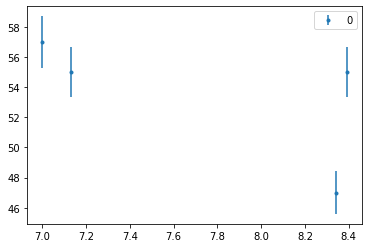

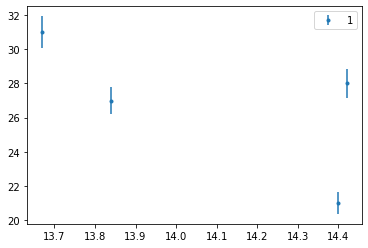

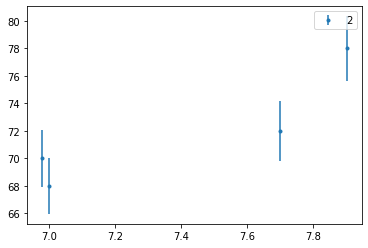

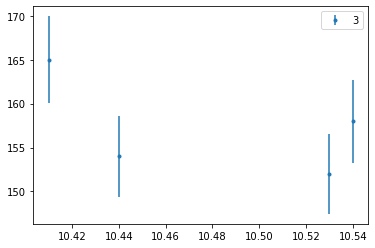

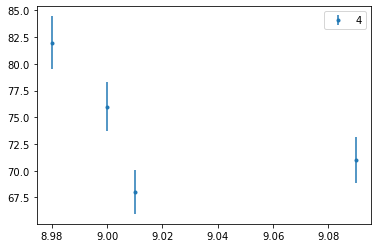

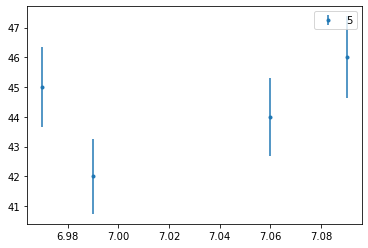

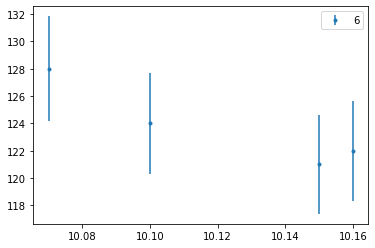

0    2.120526
1    3.480787
2    1.149231
3    1.717931
4    1.315185
5    1.737692
6    1.394286
Name:  x0[mm], dtype: float64 +- [ 2.19657665  2.04252586  7.92907821  7.57009777  4.57557504  3.62895023
 23.72016051]


In [10]:
ArrX = np.asarray(df1.iloc[:,8:12])
ArrY = np.asarray(df1.iloc[:,3:7])
ArrsX = ArrX*0.005
ArrsY = ArrY*0.03

Xmin = np.asarray([])
sXmin = np.asarray([])

for x in range(len(ArrX)):

    X  = ArrX[x]
    sX = ArrsX[x]
    Y  = ArrY[x]
    sY = ArrsY[x]

    plt.errorbar(X,Y,sY, ls='', marker='.',label = '{}'.format(x))
    plt.legend()
    plt.show()
    m1,sm1,q1,sq1 = Retta(X[0],sX[0],X[1],sX[1],Y[0],sY[0],Y[1],sY[1])
    m2,sm2,q2,sq2 = Retta(X[2],sX[2],X[3],sX[3],Y[2],sY[2],Y[3],sY[3])


    Value = (q2-q1)/(m1-m2)
    sValue = my.SigmaM(m2,sm2,m1,sm1,q1,sq1,q2,sq2)      
    
    Xmin = np.append(Xmin,Value)                         
    sXmin = np.append(sXmin,sValue)

A = Xmin
Xmin =  np.abs(Xmin  - df1.iloc[:,7])

#x = np.linspace(13.5,15,100)
#plt.errorbar(X,Y,yerr=sY,ls='',color='g',marker='.')
#plt.plot(x,(m1)*x+q1)
#plt.plot(x,(m2)*x+q2)
#plt.vlines(Value, ymin=0, ymax = 100)

#plt.ylim(0,100)
#plt.xlim(13.6,14.5)

#Xmin[2] = Xmin[2]+0.5
Xmin[0] = Xmin[0]-0.5
Xmin[3] = Xmin[3]-0.5
Xmin[4] = Xmin[4]-0.5
print(Xmin,'+-',sXmin)

In [5]:
Z = 852     # mm 
sZ  = 2

Array_L  = Lambda(Xmin,Z,F,m)
Array_sL = SigmaLambda(Xmin,sXmin,Z,sZ,F,sF)
L = np.sum(Array_L)/len(Array_L)
sL = my.sqrt_sum(Array_sL)/len(Array_sL)
#sL = 1
print(Array_L)
print('Lambda =',L,' +- ',sL)

0    497.776130
1    817.086245
2    539.544962
3    806.540392
4    759.169467
5    668.703266
6    536.552649
Name:  x0[mm], dtype: float64
Lambda = 660.767587375538  +-  1559.9052302747639


In [6]:
A[0] = A[0]-0.5
A[3] = A[3]-0.5

B = np.asarray([])
B = np.append(B,A[0]-A[1])
B = np.append(B,A[2]-A[3])
B = np.append(B,A[5]-A[6])
B = np.abs(B/2)
print(B)

[3.30065686 1.4335809  1.56598901]


In [23]:
m2 = np.asarray([1,1,1.22])
F2 = np.asarray([0.2,0.4,0.4])
AL  = Lambda(B,Z,F2,m2)
L2 = np.sum(AL)/len(AL)
print(AL)
print('Lambda =',L2)

[774.8020795  673.04267693 602.62795774]
Lambda = 683.4909047243859
